## 1.反转链表
输入一个链表，反转链表后，输出新链表的表头。

示例1
```
输入
{1,2,3}
```
```
返回值
{3,2,1}
```

#### ListNode
```c
struct ListNode {
    int val;
    struct ListNode *next;
    ListNode(int x) :
            val(x), next(NULL) {
    }
};
```
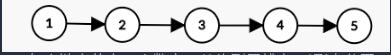
单链表结构，格式{0,1,2,3,4}，每个链表节点一个数字，从头到尾排布，通过,分开。

#### TreeLinkNode
```c
struct TreeLinkNode {
    int val;
    struct TreeLinkNode *left;
    struct TreeLinkNode *right;
    struct TreeLinkNode *next;
    TreeLinkNode(int x) :
            val(x), left(NULL), right(NULL), next(NULL) {
    }
};
```
在TreeNode的基础上，额外横向增加一个链接节点，数据的序列化格式在TreeNode的基础上，额外增加next节点的数据，图中红色链路为next
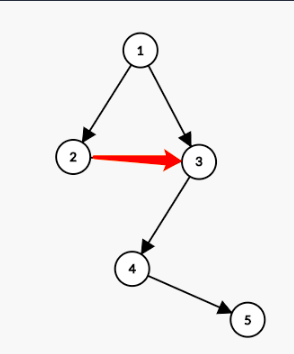
上图中2节点的next为3节点，以上链接二叉树会被序列化为 {[1,2,3,#,#,4,#,#,5],[#,3,#,#,#]}

####  RandomListNode
```c
struct RandomListNode {
    int label;
    struct RandomListNode *next, *random;
    RandomListNode(int x) :
            label(x), next(NULL), random(NULL) {
    }
};
```
在ListNode基础上，额外增加一个random的链接节点，数据的序列化格式在ListNode的基础上，额外增加random节点的数据，图中红色链路为random
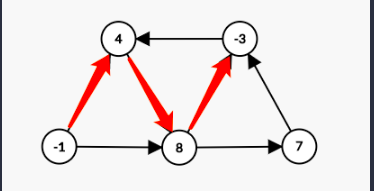
上图对应测试数据为 {-1,8,7,-3,4,4,-3,#,#,8}，前五个数字是链表节点，后五个数字表示各个节点的random的链接点

#### UndirectedGraphNode
```c
struct UndirectedGraphNode {
    int label;
    vector<struct UndirectedGraphNode *> neighbors;
    UndirectedGraphNode(int x) :
            label(x) {
    }
};
```
无向图里每个节点都有一个 唯一的数字ID ,每个节点的序列化通过[]保存,每个节点第一个元素后跟随的是这个节点连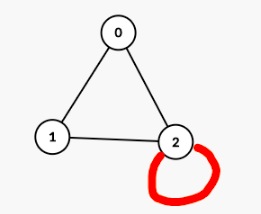
注意2节点还链接到自己节点，上图对应测试数据为{[0,1,2],[1,2],[2,2]}，从小到大0，1，2三个节点

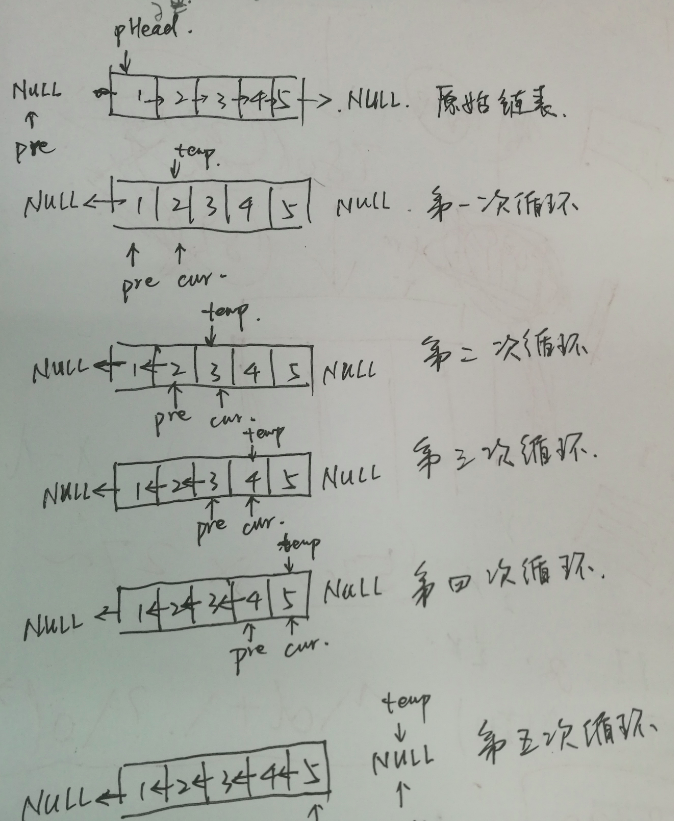

In [2]:
# -*- coding:utf-8 -*-
# class ListNode:
#     def __init__(self, x):
#         self.val = x
#         self.next = None
        
class Solution:
    # 返回ListNode
    def ReverseList(self, pHead):
        if pHead is None or pHead.next is None:
            return None
        pre = None
        cur = pHead
        while cur != None:
            tmp = cur.next
            cur.next = pre
            pre = cur
            cur = tmp
        return pre

---
### [Offer 078. Merge and sort linked lists](https://leetcode.cn/problems/vvXgSW/)

**Description**:


**Examples**:
```
Input:  lists = [[1,4,5],[1,3,4],[2,6]] 
  Output:  [1,1,2,3,4,4,5,6] 
  Explanation:  The linked list array is as follows: 
  [ 
    1->4->5, 
    1->3->4, 
    2->6 
  ] 
  Merge them into an ordered linked list to get. 
  1->1->2->3->4->4->5->6 
```

```
Input: lists = [] (or [[]])
Output: []
```

In [ ]:
def mergeKLists(lists):
    pass